In [2]:
!pip install netcdf4 
!pip install git+https://github.com/fujiisoup/pyspectra.git

from os.path import join
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pyspectra
from google.colab import drive

drive.mount('/content/drive')

     |████████████████████████████████| 4.3MB 2.7MB/s 
     |████████████████████████████████| 296kB 35.3MB/s 
  Cloning https://github.com/fujiisoup/pyspectra.git to /tmp/pip-req-build-d01xw_qx
  Running command git clone -q https://github.com/fujiisoup/pyspectra.git /tmp/pip-req-build-d01xw_qx
  Created wheel for pyspectra: filename=pyspectra-0.0.1-cp36-none-any.whl size=18317 sha256=d986c050b6cc2c732e5de8403092084093a655fc8dee9a036c7b4e104182ced4
  Stored in directory: /tmp/pip-ephem-wheel-cache-58epsc5z/wheels/a7/c4/4a/152e6df7ccc3c6838abee31c086e30a3690c80966eb588e7a2
Successfully built pyspectra
Mounted at /content/drive


In [3]:
data_dir = join('drive', 'My Drive', '研究室', 'MyLeprecon', 'SpectrometerData', '20201106')

file_names = [f'H_{430000 + 5000*i}.nc' for i in range(10)]
data = []
for file_name in file_names:
  data_array = xr.open_dataarray(join(data_dir, file_name))
  data_array['motor_coordinate'] = data_array.attrs['motor_coordinate']
  data.append(data_array)
data = xr.concat(data, dim='motor_coordinate')

plt.figure(figsize=(15, 5))
plasma_data = []
for i, p in enumerate(data['motor_coordinate']):
  d = data.sel(motor_coordinate=p).copy()
  d['long_x'] = d['x'][::-1] - 1000 * i
  d['x'] = data['x']
  plasma_data.append(d.sum('y'))
plasma_data = xr.concat(plasma_data, dim='motor_coordinate')
plasma_data

<xarray.DataArray (motor_coordinate: 10, x: 2048)>
array([[1112705, 1112959, 1113278, ..., 1117614, 1117616, 1116437],
       [1119480, 1119362, 1119135, ..., 1121439, 1121714, 1122749],
       [1121754, 1120079, 1119452, ..., 1119217, 1119796, 1119437],
       ...,
       [1139127, 1132634, 1127491, ..., 1384059, 1386796, 1389542],
       [1107041, 1107395, 1107196, ..., 1103040, 1102904, 1103383],
       [1101681, 1101258, 1101259, ..., 1103001, 1104798, 1105467]],
      dtype=uint64)
Coordinates:
    image_counter     int32 0
  * x                 (x) int64 0 1 2 3 4 5 6 ... 2042 2043 2044 2045 2046 2047
  * motor_coordinate  (motor_coordinate) int64 430000 435000 ... 470000 475000
    long_x            (motor_coordinate, x) int64 2047 2046 2045 ... -8999 -9000

<Figure size 1080x360 with 0 Axes>

In [4]:
file_names = [f'back_{430000 + 5000*i}.nc' for i in range(10)]
data = []
for file_name in file_names:
  data_array = xr.open_dataarray(join(data_dir, file_name))
  data_array['motor_coordinate'] = data_array.attrs['motor_coordinate']
  data.append(data_array)
data = xr.concat(data, dim='motor_coordinate')

plt.figure(figsize=(15, 5))
back_data = []
for i, p in enumerate(data['motor_coordinate']):
  d = data.sel(motor_coordinate=p).copy()
  d['long_x'] = d['x'][::-1] - 1000 * i
  d['x'] = data['x']
  back_data.append(d.sum('y'))
back_data = xr.concat(back_data, dim='motor_coordinate')
back_data

<xarray.DataArray (motor_coordinate: 10, x: 2048)>
array([[1070217, 1070023, 1070392, ..., 1071270, 1071424, 1071171],
       [1070993, 1070797, 1070704, ..., 1071401, 1071897, 1071529],
       [1071235, 1070700, 1071231, ..., 1071710, 1072021, 1071801],
       ...,
       [1071492, 1071431, 1071420, ..., 1071329, 1071615, 1071947],
       [1071349, 1071631, 1071374, ..., 1071002, 1071796, 1071804],
       [1071490, 1071540, 1071493, ..., 1070927, 1071098, 1071454]],
      dtype=uint64)
Coordinates:
    image_counter     int32 0
  * x                 (x) int64 0 1 2 3 4 5 6 ... 2042 2043 2044 2045 2046 2047
  * motor_coordinate  (motor_coordinate) int64 430000 435000 ... 470000 475000
    long_x            (motor_coordinate, x) int64 2047 2046 2045 ... -8999 -9000

<Figure size 1080x360 with 0 Axes>

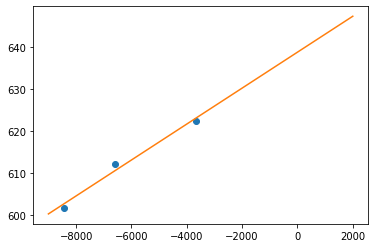

In [5]:
pixels = np.array([-8425, -6600, -3670])
wave = np.array([601.8299, 612.1787, 622.4815])
plt.plot(pixels, wave, 'o')

fun = np.poly1d(np.polyfit(pixels, wave, 1))
x = np.linspace(-9000, 2000, 100)
plt.plot(x, fun(x))


Text(0, 0.5, 'intencity (a.u.)')

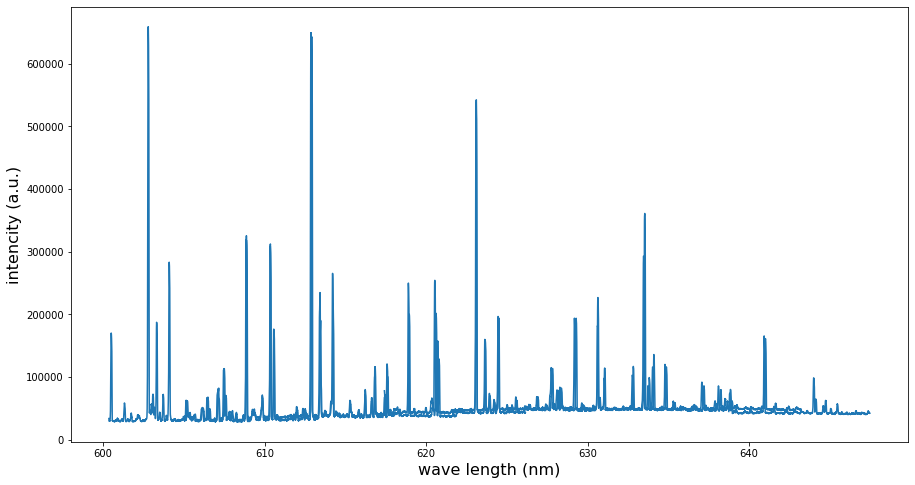

In [6]:
spectrum_data = plasma_data - back_data * 1.0

plt.figure(figsize=[15, 8])
for f in spectrum_data:
  plt.plot(fun(f['long_x']), f, 'C0')
#plt.xlim(-4000, -3500)
plt.xlabel('wave length (nm)', fontsize=16)
plt.ylabel('intencity (a.u.)', fontsize=16)

#D2

In [7]:
data_dir = join('drive', 'My Drive', '研究室', 'MyLeprecon', 'SpectrometerData', '20201106')

file_names = [f'D_{430000 + 5000*i}.nc' for i in range(10)]
data = []
for file_name in file_names:
  data_array = xr.open_dataarray(join(data_dir, file_name))
  data_array['motor_coordinate'] = data_array.attrs['motor_coordinate']
  data.append(data_array)
data = xr.concat(data, dim='motor_coordinate')

plt.figure(figsize=(15, 5))
Dplasma_data = []
for i, p in enumerate(data['motor_coordinate']):
  d = data.sel(motor_coordinate=p).copy()
  d['long_x'] = d['x'][::-1] - 1000 * i
  d['x'] = data['x']
  Dplasma_data.append(d.sum('y'))
Dplasma_data = xr.concat(Dplasma_data, dim='motor_coordinate')
Dplasma_data

<xarray.DataArray (motor_coordinate: 10, x: 2048)>
array([[1082683, 1082175, 1082421, ..., 1093800, 1094433, 1093953],
       [1083053, 1083066, 1082722, ..., 1084622, 1085290, 1084650],
       [1091935, 1091825, 1092033, ..., 1087760, 1087778, 1087977],
       ...,
       [1082069, 1081728, 1080996, ..., 1084748, 1084090, 1085133],
       [1081431, 1080919, 1080522, ..., 1095470, 1096761, 1096338],
       [1078386, 1078167, 1077941, ..., 1087248, 1085945, 1085152]],
      dtype=uint64)
Coordinates:
    image_counter     int32 0
  * x                 (x) int64 0 1 2 3 4 5 6 ... 2042 2043 2044 2045 2046 2047
  * motor_coordinate  (motor_coordinate) int64 430000 435000 ... 470000 475000
    long_x            (motor_coordinate, x) int64 2047 2046 2045 ... -8999 -9000

<Figure size 1080x360 with 0 Axes>

In [8]:
file_names = [f'Dback_{430000 + 5000*i}.nc' for i in range(10)]
data = []
for file_name in file_names:
  data_array = xr.open_dataarray(join(data_dir, file_name))
  data_array['motor_coordinate'] = data_array.attrs['motor_coordinate']
  data.append(data_array)
data = xr.concat(data, dim='motor_coordinate')

plt.figure(figsize=(15, 5))
Dback_data = []
for i, p in enumerate(data['motor_coordinate']):
  d = data.sel(motor_coordinate=p).copy()
  d['long_x'] = d['x'][::-1] - 1000 * i
  d['x'] = data['x']
  Dback_data.append(d.sum('y'))
Dback_data = xr.concat(Dback_data, dim='motor_coordinate')
Dback_data

<xarray.DataArray (motor_coordinate: 10, x: 2048)>
array([[1049147, 1049216, 1048987, ..., 1049283, 1049427, 1049198],
       [1048961, 1048981, 1049441, ..., 1049368, 1049455, 1049629],
       [1049569, 1048955, 1049563, ..., 1049585, 1049809, 1049235],
       ...,
       [1048978, 1048808, 1048698, ..., 1049138, 1049153, 1049071],
       [1049193, 1049290, 1049454, ..., 1049019, 1049195, 1049221],
       [1049133, 1049000, 1049084, ..., 1049293, 1048906, 1049002]],
      dtype=uint64)
Coordinates:
    image_counter     int32 0
  * x                 (x) int64 0 1 2 3 4 5 6 ... 2042 2043 2044 2045 2046 2047
  * motor_coordinate  (motor_coordinate) int64 430000 435000 ... 470000 475000
    long_x            (motor_coordinate, x) int64 2047 2046 2045 ... -8999 -9000

<Figure size 1080x360 with 0 Axes>

Text(0, 0.5, 'intencity (a.u.)')

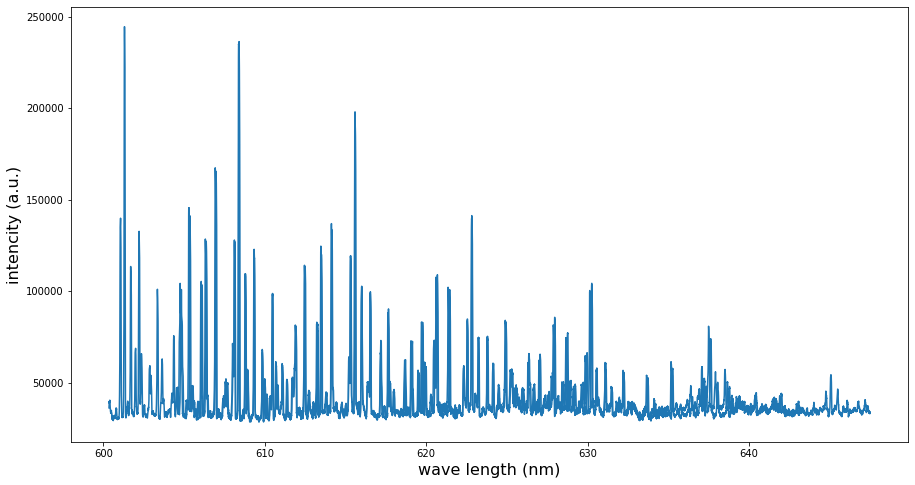

In [9]:
Dspectrum_data = Dplasma_data - Dback_data * 1.0

plt.figure(figsize=[15, 8])
for f in Dspectrum_data:
  plt.plot(fun(f['long_x']), f, 'C0')
#plt.xlim(-4000, -3500)
plt.xlabel('wave length (nm)', fontsize=16)
plt.ylabel('intencity (a.u.)', fontsize=16)

#Ar

In [10]:
data_dir = join('drive', 'My Drive', '研究室', 'MyLeprecon', 'SpectrometerData', '20201106')

file_names = [f'Ar_{430000 + 5000*i}.nc' for i in range(10)]
data = []
for file_name in file_names:
  data_array = xr.open_dataarray(join(data_dir, file_name))
  data_array['motor_coordinate'] = data_array.attrs['motor_coordinate']
  data.append(data_array)
data = xr.concat(data, dim='motor_coordinate')

plt.figure(figsize=(15, 5))
Aplasma_data = []
for i, p in enumerate(data['motor_coordinate']):
  d = data.sel(motor_coordinate=p).copy()
  d['long_x'] = d['x'][::-1] - 1000 * i
  d['x'] = data['x']
  Aplasma_data.append(d.sum('y'))
Aplasma_data = xr.concat(Aplasma_data, dim='motor_coordinate')
Aplasma_data

<xarray.DataArray (motor_coordinate: 10, x: 2048)>
array([[1174417, 1174514, 1174332, ..., 1175818, 1176399, 1176563],
       [1175218, 1175167, 1175326, ..., 1174092, 1175136, 1175043],
       [1177250, 1177782, 1177067, ..., 1178347, 1178971, 1179355],
       ...,
       [1178756, 1177763, 1177855, ..., 1179683, 1179026, 1178182],
       [1179829, 1180799, 1179894, ..., 1168935, 1169265, 1169590],
       [1169979, 1170424, 1170503, ..., 1165823, 1165810, 1166685]],
      dtype=uint64)
Coordinates:
    image_counter     int32 0
  * x                 (x) int64 0 1 2 3 4 5 6 ... 2042 2043 2044 2045 2046 2047
  * motor_coordinate  (motor_coordinate) int64 430000 435000 ... 470000 475000
    long_x            (motor_coordinate, x) int64 2047 2046 2045 ... -8999 -9000

<Figure size 1080x360 with 0 Axes>

In [11]:
file_names = [f'Dback_{430000 + 5000*i}.nc' for i in range(10)]
data = []
for file_name in file_names:
  data_array = xr.open_dataarray(join(data_dir, file_name))
  data_array['motor_coordinate'] = data_array.attrs['motor_coordinate']
  data.append(data_array)
data = xr.concat(data, dim='motor_coordinate')

plt.figure(figsize=(15, 5))
Dback_data = []
for i, p in enumerate(data['motor_coordinate']):
  d = data.sel(motor_coordinate=p).copy()
  d['long_x'] = d['x'][::-1] - 1000 * i
  d['x'] = data['x']
  Dback_data.append(d.sum('y'))
Dback_data = xr.concat(Dback_data, dim='motor_coordinate')
Dback_data

<xarray.DataArray (motor_coordinate: 10, x: 2048)>
array([[1049147, 1049216, 1048987, ..., 1049283, 1049427, 1049198],
       [1048961, 1048981, 1049441, ..., 1049368, 1049455, 1049629],
       [1049569, 1048955, 1049563, ..., 1049585, 1049809, 1049235],
       ...,
       [1048978, 1048808, 1048698, ..., 1049138, 1049153, 1049071],
       [1049193, 1049290, 1049454, ..., 1049019, 1049195, 1049221],
       [1049133, 1049000, 1049084, ..., 1049293, 1048906, 1049002]],
      dtype=uint64)
Coordinates:
    image_counter     int32 0
  * x                 (x) int64 0 1 2 3 4 5 6 ... 2042 2043 2044 2045 2046 2047
  * motor_coordinate  (motor_coordinate) int64 430000 435000 ... 470000 475000
    long_x            (motor_coordinate, x) int64 2047 2046 2045 ... -8999 -9000

<Figure size 1080x360 with 0 Axes>

Text(0, 0.5, 'intencity (a.u.)')

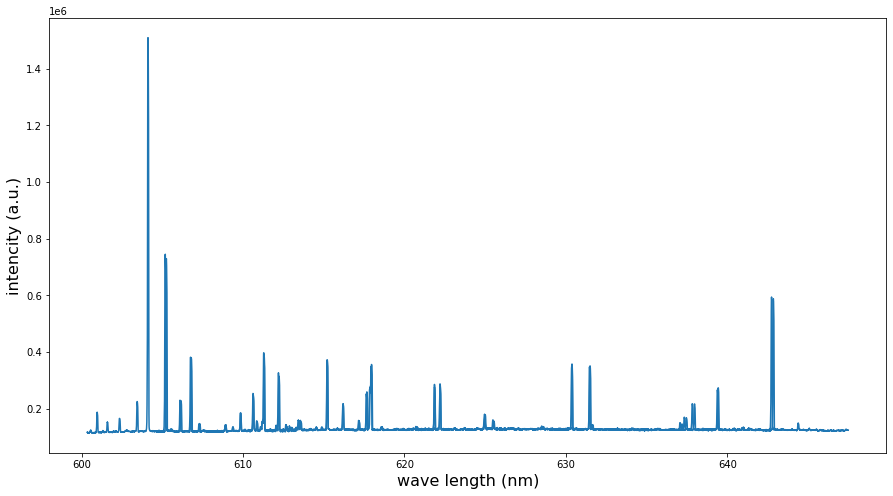

In [12]:
Aspectrum_data = Aplasma_data - Dback_data * 1.0

plt.figure(figsize=[15, 8])
for f in Aspectrum_data:
  plt.plot(fun(f['long_x']), f, 'C0')
#plt.xlim(-4000, -3500)
plt.xlabel('wave length (nm)', fontsize=16)
plt.ylabel('intencity (a.u.)', fontsize=16)

<Figure size 432x288 with 0 Axes>

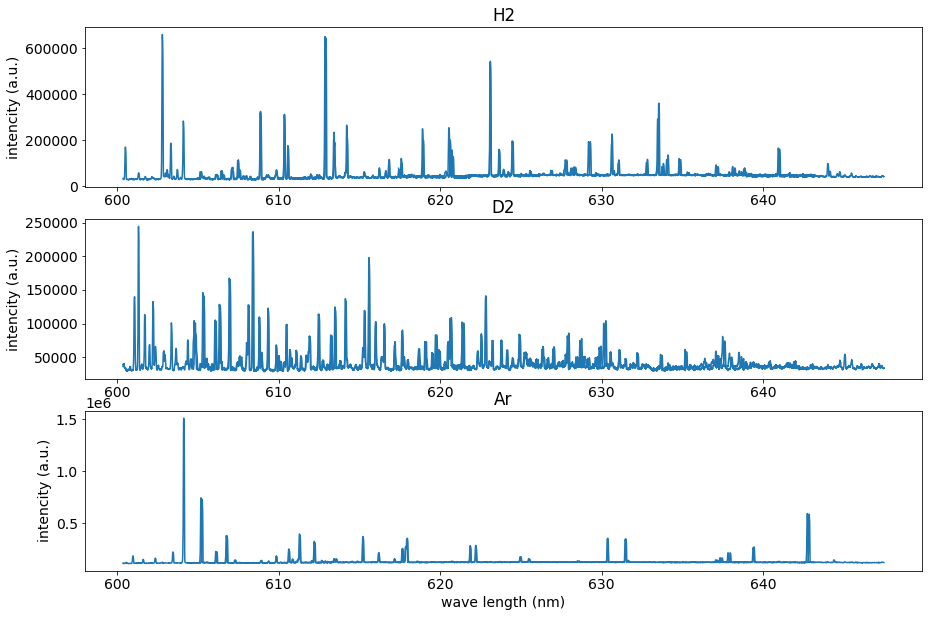

In [14]:
plt.subplots_adjust(top=2)
plt.figure(figsize=[15, 10])
plt.subplot(3, 1, 1)
plt.rcParams['font.size'] = 14
plt.title('H2')
plt.ylabel('intencity (a.u.)')
for f in spectrum_data:
  plt.plot(fun(f['long_x']), f, 'C0')
plt.subplot(3, 1, 2)
plt.title('D2')
plt.ylabel('intencity (a.u.)')
for f in Dspectrum_data:
  plt.plot(fun(f['long_x']), f, 'C0')
plt.subplot(3, 1, 3)
plt.title('Ar')
plt.ylabel('intencity (a.u.)')
for f in Aspectrum_data:
  plt.plot(fun(f['long_x']), f, 'C0')

plt.xlabel('wave length (nm)')
plt.savefig(join('drive', 'My Drive', '研究室', 'images','plasmas'))